# 最小二乗確率的分類
ガウスカーネルモデルに対して，最小二乗確率的分類の手法で多クラス分類を行う．  
二乗誤差の最小化を標本近似によって行う．  
この場合解は解析的に求まる．  
θ= (Φ^T Φ - λI) ^(-1) Φ^T π

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# training data生成
def generate_data(sample_size, n_class):
    np.random.seed(1)
    x = (np.random.normal(size=(sample_size // n_class, n_class))
         + np.linspace(-3., 3., n_class)).flatten()
    y = np.broadcast_to(np.arange(n_class),
                        (sample_size // n_class, n_class)).flatten()
    return x, y

In [3]:
#ガウスカーネルを生成
def calc_design_matrix(x, c, h):
    return np.exp(-(x[None] - c[:, None]) ** 2 / (2 * h ** 2))

In [4]:
# テスト&プロット
def visualize(x, y, theta, h):
    x_test = np.linspace(-5., 5., num=1000)
    k_test = calc_design_matrix(x, x_test, h)
    pred_test = np.maximum(0, k_test.dot(theta))
    pred_test = pred_test / np.sum(pred_test, axis=1, keepdims=True)
    
    plt.clf()
    plt.xlim(-5, 5)
    plt.ylim(-.3, 1.8)

    plt.plot(x_test, pred_test[:, 0], c='blue')
    plt.plot(x_test, pred_test[:, 1], c='red')
    plt.plot(x_test, pred_test[:, 2], c='green')

    plt.scatter(x[y == 0], -.1 * np.ones(len(x) // 3), c='blue', marker='o')
    plt.scatter(x[y == 1], -.2 * np.ones(len(x) // 3), c='red', marker='x')
    plt.scatter(x[y == 2], -.1 * np.ones(len(x) // 3), c='green', marker='v')

    #plt.savefig('lecture7.png')
    plt.show()

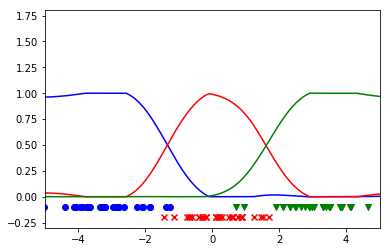

In [5]:
l = 10
h = 1
n_class = 3
sample_size = 90

#訓練データで最適なパラメータを求める
x, y = generate_data(sample_size, n_class)
k = calc_design_matrix(x, x, h)
phi = np.zeros((sample_size, n_class))
for i in range(n_class):
    phi[:, i] = (y == i)
#解析解
theta = np.linalg.solve(k.T.dot(k) + l*np.identity(len(k)), k.T.dot(phi))

visualize(x, y, theta, h)

クラス数3の一次元データの分類．下の点が各標本を表す（色はクラス情報）．  
各曲線はそれぞれのクラスである確率を表現している．   
分布に重複のある多クラス識別問題でも適切に確率が表現できている．  
パラメータIやhの選び方によってはかなり結果に差が出る．  